In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

# Đọc file CSV
df_fpt = pd.read_csv('stock data/FPT_stock_data.csv')
df_mbb = pd.read_csv('stock data/MB Bank_stock_data.csv')
df_hpg = pd.read_csv('stock data/Hòa Phát_stock_data.csv')
df_hag = pd.read_csv('stock data/Hoàng Anh Gia Lai_stock_data.csv')
df_vnm = pd.read_csv('stock data/Vinamilk_stock_data.csv')

# Tính tỷ lệ thay đổi logarit cho từng DataFrame
r_t_fpt = np.log(df_fpt['Close'] / df_fpt['Close'].shift(1)).values
r_t_mbb = np.log(df_mbb['Close'] / df_mbb['Close'].shift(1)).values
r_t_hpg = np.log(df_hpg['Close'] / df_hpg['Close'].shift(1)).values
r_t_hag = np.log(df_hag['Close'] / df_hag['Close'].shift(1)).values
r_t_vnm = np.log(df_vnm['Close'] / df_vnm['Close'].shift(1)).values

# Tính trung bình và thay thế giá trị NaN tại đầu chuỗi cho từng DataFrame
mean_fpt = np.nanmean(r_t_fpt)
r_t_fpt[0] = mean_fpt

mean_mbb = np.nanmean(r_t_mbb)
r_t_mbb[0] = mean_mbb

mean_hpg = np.nanmean(r_t_hpg)
r_t_hpg[0] = mean_hpg

mean_hag = np.nanmean(r_t_hag)
r_t_hag[0] = mean_hag

mean_vnm = np.nanmean(r_t_vnm)
r_t_vnm[0] = mean_vnm

# In ra 5 giá trị đầu tiên của tỷ lệ thay đổi logarit cho từng cổ phiếu
print("FPT:", r_t_fpt[:5])
print("MB Bank:", r_t_mbb[:5])
print("Hòa Phát:", r_t_hpg[:5])
print("Hoàng Anh Gia Lai:", r_t_hag[:5])
print("Vinamilk:", r_t_vnm[:5])

FPT: [ 0.00040062 -0.03659061  0.          0.         -0.03154689]
MB Bank: [ 9.36734023e-05  0.00000000e+00  1.18956042e-03  1.28570353e-03
 -1.38530096e-03]
Hòa Phát: [ 0.00057094 -0.03174905  0.         -0.00809697 -0.01639455]
Hoàng Anh Gia Lai: [-0.00053921 -0.03096265 -0.00630967  0.00630967 -0.00630967]
Vinamilk: [-0.00014125 -0.03083166  0.02040078  0.01464953  0.03164097]


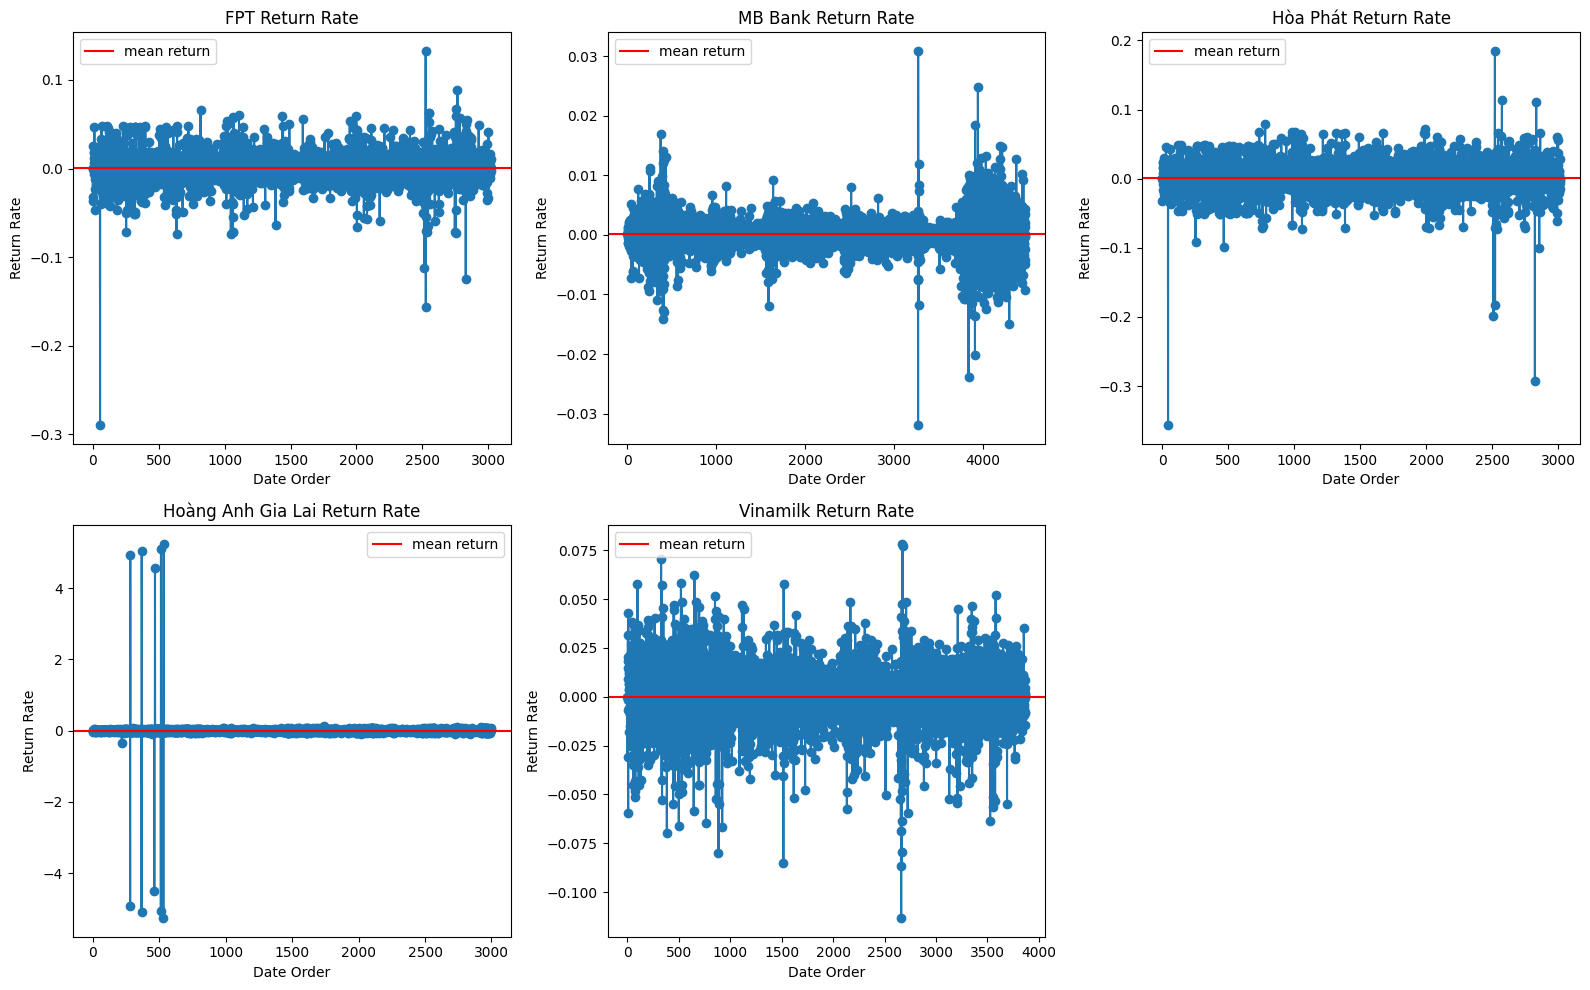

In [2]:
# Đặt kích thước cho biểu đồ
plt.figure(figsize=(16, 10))

# Vẽ đồ thị cho từng cổ phiếu và thêm đường trung bình
# FPT
plt.subplot(231)  # 2 rows, 3 columns, plot number 1
plt.plot(np.arange(len(r_t_fpt)), r_t_fpt, '-o')
plt.axhline(y=mean_fpt, label='mean return', c='red')
plt.title('FPT Return Rate')
plt.xlabel('Date Order')
plt.ylabel('Return Rate')
plt.legend()

# MB Bank
plt.subplot(232)  # 2 rows, 3 columns, plot number 2
plt.plot(np.arange(len(r_t_mbb)), r_t_mbb, '-o')
plt.axhline(y=mean_mbb, label='mean return', c='red')
plt.title('MB Bank Return Rate')
plt.xlabel('Date Order')
plt.ylabel('Return Rate')
plt.legend()

# Hòa Phát
plt.subplot(233)  # 2 rows, 3 columns, plot number 3
plt.plot(np.arange(len(r_t_hpg)), r_t_hpg, '-o')
plt.axhline(y=mean_hpg, label='mean return', c='red')
plt.title('Hòa Phát Return Rate')
plt.xlabel('Date Order')
plt.ylabel('Return Rate')
plt.legend()

# Hoàng Anh Gia Lai
plt.subplot(234)  # 2 rows, 3 columns, plot number 4
plt.plot(np.arange(len(r_t_hag)), r_t_hag, '-o')
plt.axhline(y=mean_hag, label='mean return', c='red')
plt.title('Hoàng Anh Gia Lai Return Rate')
plt.xlabel('Date Order')
plt.ylabel('Return Rate')
plt.legend()

# Vinamilk
plt.subplot(235)  # 2 rows, 3 columns, plot number 5
plt.plot(np.arange(len(r_t_vnm)), r_t_vnm, '-o')
plt.axhline(y=mean_vnm, label='mean return', c='red')
plt.title('Vinamilk Return Rate')
plt.xlabel('Date Order')
plt.ylabel('Return Rate')
plt.legend()

# Hiển thị tất cả các biểu đồ
plt.tight_layout()
plt.show()


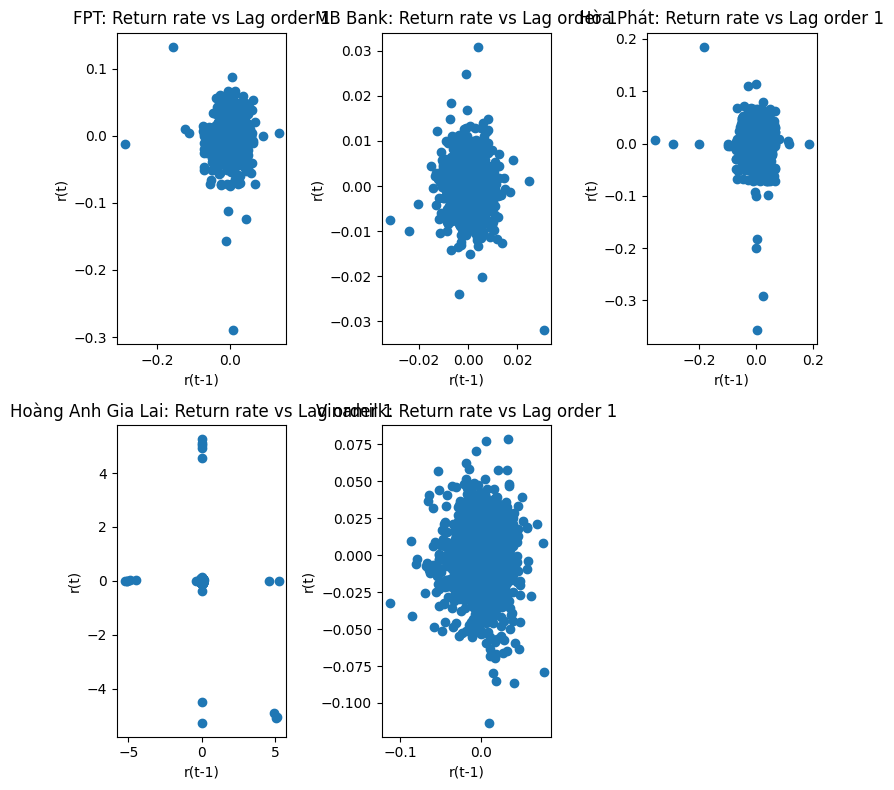

In [3]:
# Tạo đồ thị scatter cho từng cổ phiếu
plt.figure(figsize=(8, 8))

# FPT
plt.subplot(231)  # 2 rows, 3 columns, plot number 1
plt.scatter(x=r_t_fpt[1:], y=r_t_fpt[:-1])
plt.title('FPT: Return rate vs Lag order 1')
plt.xlabel('r(t-1)')
plt.ylabel('r(t)')

# MB Bank
plt.subplot(232)  # 2 rows, 3 columns, plot number 2
plt.scatter(x=r_t_mbb[1:], y=r_t_mbb[:-1])
plt.title('MB Bank: Return rate vs Lag order 1')
plt.xlabel('r(t-1)')
plt.ylabel('r(t)')

# Hòa Phát
plt.subplot(233)  # 2 rows, 3 columns, plot number 3
plt.scatter(x=r_t_hpg[1:], y=r_t_hpg[:-1])
plt.title('Hòa Phát: Return rate vs Lag order 1')
plt.xlabel('r(t-1)')
plt.ylabel('r(t)')

# Hoàng Anh Gia Lai
plt.subplot(234)  # 2 rows, 3 columns, plot number 4
plt.scatter(x=r_t_hag[1:], y=r_t_hag[:-1])
plt.title('Hoàng Anh Gia Lai: Return rate vs Lag order 1')
plt.xlabel('r(t-1)')
plt.ylabel('r(t)')

# Vinamilk
plt.subplot(235)  # 2 rows, 3 columns, plot number 5
plt.scatter(x=r_t_vnm[1:], y=r_t_vnm[:-1])
plt.title('Vinamilk: Return rate vs Lag order 1')
plt.xlabel('r(t-1)')
plt.ylabel('r(t)')

# Hiển thị tất cả các biểu đồ
plt.tight_layout()
plt.show()


<Figure size 800x600 with 0 Axes>

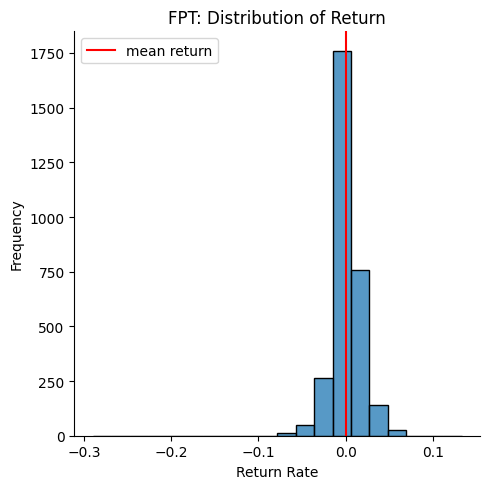

<Figure size 800x600 with 0 Axes>

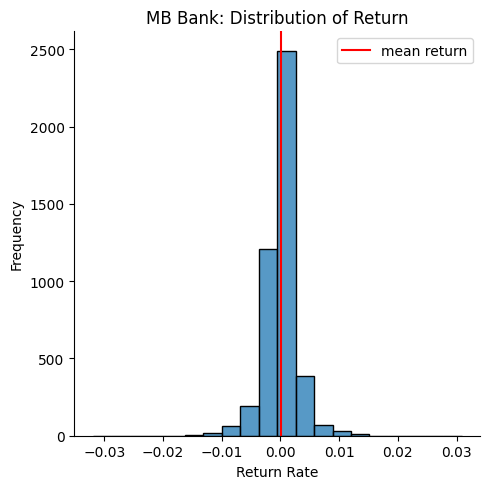

<Figure size 800x600 with 0 Axes>

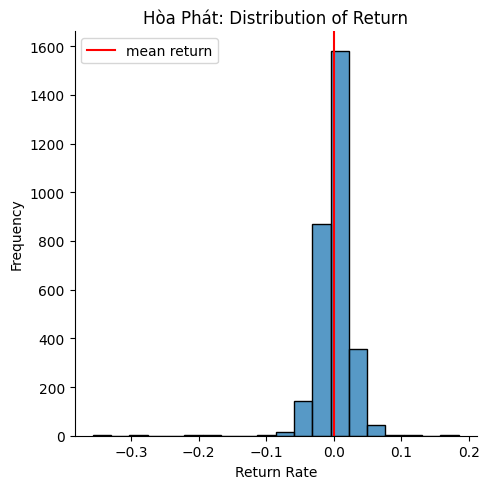

<Figure size 800x600 with 0 Axes>

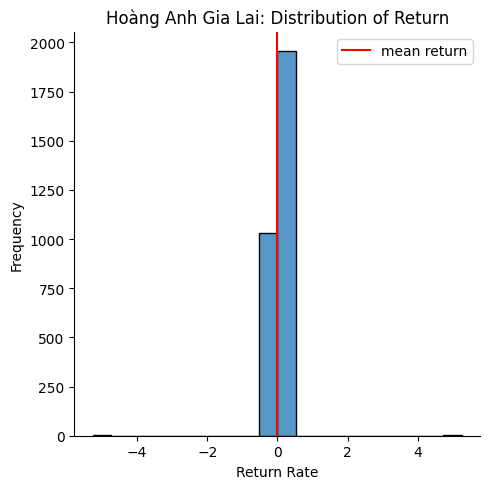

<Figure size 800x600 with 0 Axes>

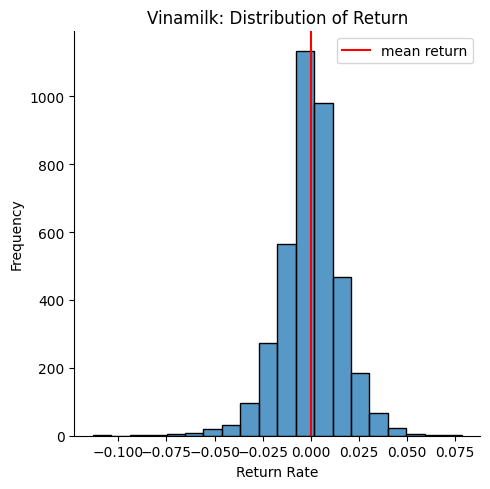

In [4]:
# Tạo histogram cho từng cổ phiếu
plt.figure(figsize=(8, 6))

# FPT
sns.displot(r_t_fpt, bins=20)
plt.axvline(x=mean_fpt, label='mean return', c='red')
plt.title('FPT: Distribution of Return')
plt.legend()
plt.xlabel('Return Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# MB Bank
plt.figure(figsize=(8, 6))
sns.displot(r_t_mbb, bins=20)
plt.axvline(x=mean_mbb, label='mean return', c='red')
plt.title('MB Bank: Distribution of Return')
plt.legend()
plt.xlabel('Return Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Hòa Phát
plt.figure(figsize=(8, 6))
sns.displot(r_t_hpg, bins=20)
plt.axvline(x=mean_hpg, label='mean return', c='red')
plt.title('Hòa Phát: Distribution of Return')
plt.legend()
plt.xlabel('Return Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Hoàng Anh Gia Lai
plt.figure(figsize=(8, 6))
sns.displot(r_t_hag, bins=20)
plt.axvline(x=mean_hag, label='mean return', c='red')
plt.title('Hoàng Anh Gia Lai: Distribution of Return')
plt.legend()
plt.xlabel('Return Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Vinamilk
plt.figure(figsize=(8, 6))
sns.displot(r_t_vnm, bins=20)
plt.axvline(x=mean_vnm, label='mean return', c='red')
plt.title('Vinamilk: Distribution of Return')
plt.legend()
plt.xlabel('Return Rate')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

<Figure size 800x600 with 0 Axes>

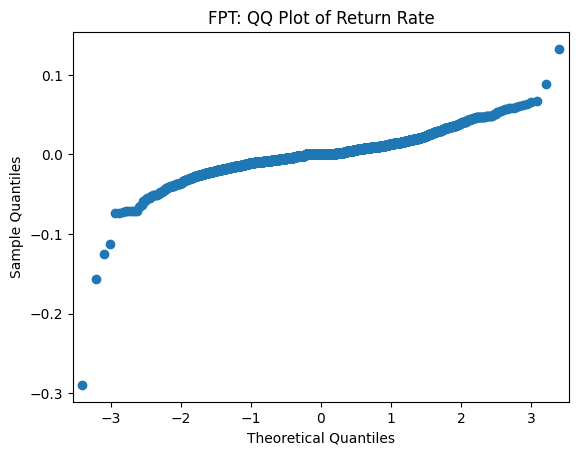

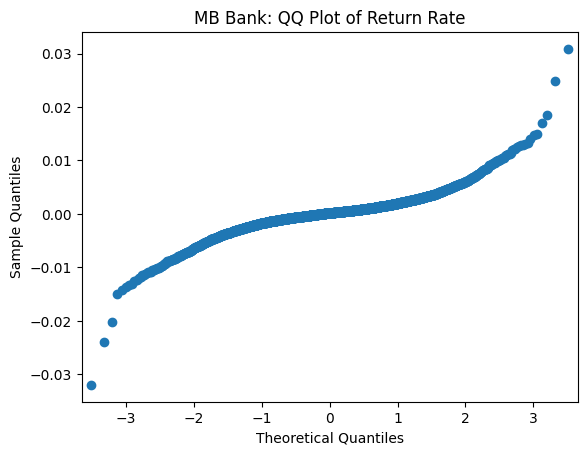

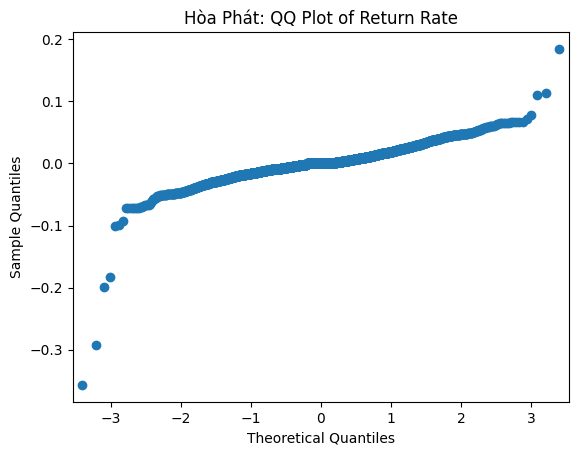

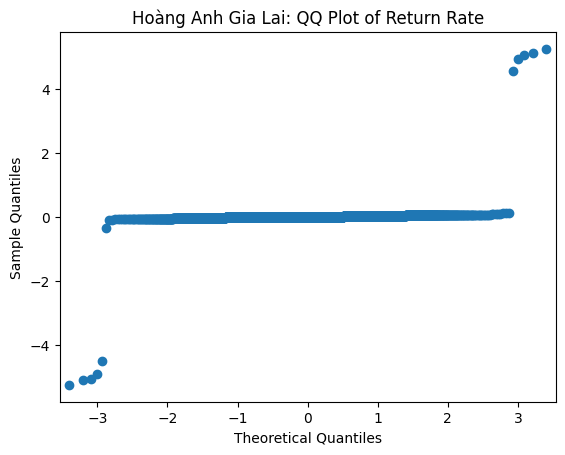

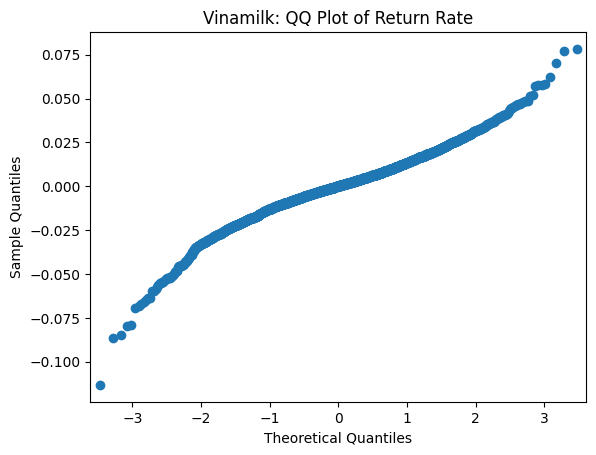

In [5]:
plt.figure(figsize=(8, 6))

# FPT - QQ Plot
sm.qqplot(r_t_fpt)
plt.title('FPT: QQ Plot of Return Rate')
plt.show()

# MB Bank - QQ Plot
sm.qqplot(r_t_mbb)
plt.title('MB Bank: QQ Plot of Return Rate')
plt.show()

# Hòa Phát - QQ Plot
sm.qqplot(r_t_hpg)
plt.title('Hòa Phát: QQ Plot of Return Rate')
plt.show()

# Hoàng Anh Gia Lai - QQ Plot
sm.qqplot(r_t_hag)
plt.title('Hoàng Anh Gia Lai: QQ Plot of Return Rate')
plt.show()

# Vinamilk - QQ Plot
sm.qqplot(r_t_vnm)
plt.title('Vinamilk: QQ Plot of Return Rate')
plt.show()

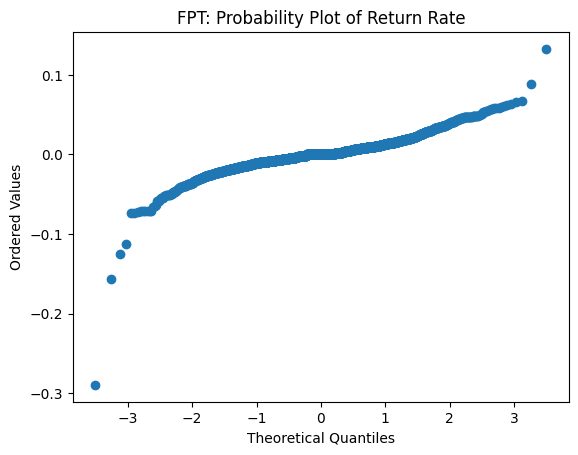

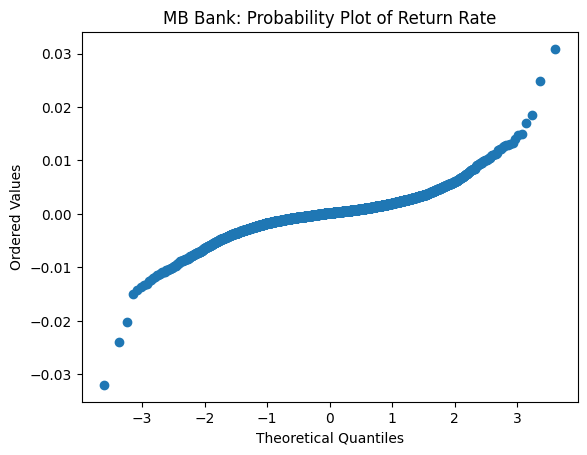

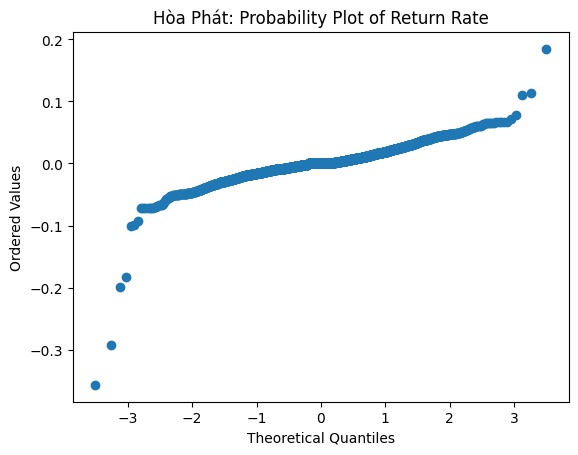

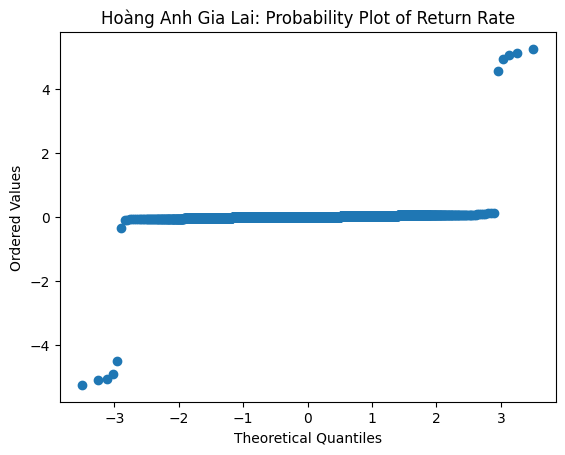

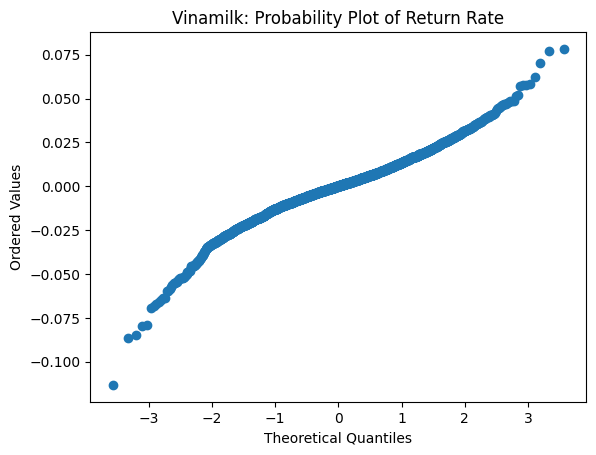

In [6]:

# FPT - Probability Plot
tq_fpt = stats.probplot(r_t_fpt)
plt.scatter(x=tq_fpt[0][0], y=tq_fpt[0][1])
plt.title('FPT: Probability Plot of Return Rate')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

# MB Bank - Probability Plot
tq_mbb = stats.probplot(r_t_mbb)
plt.scatter(x=tq_mbb[0][0], y=tq_mbb[0][1])
plt.title('MB Bank: Probability Plot of Return Rate')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

# Hòa Phát - Probability Plot
tq_hpg = stats.probplot(r_t_hpg)
plt.scatter(x=tq_hpg[0][0], y=tq_hpg[0][1])
plt.title('Hòa Phát: Probability Plot of Return Rate')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

# Hoàng Anh Gia Lai - Probability Plot
tq_hag = stats.probplot(r_t_hag)
plt.scatter(x=tq_hag[0][0], y=tq_hag[0][1])
plt.title('Hoàng Anh Gia Lai: Probability Plot of Return Rate')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

# Vinamilk - Probability Plot
tq_vnm = stats.probplot(r_t_vnm)
plt.scatter(x=tq_vnm[0][0], y=tq_vnm[0][1])
plt.title('Vinamilk: Probability Plot of Return Rate')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Ordered Values')
plt.show()

In [7]:
# FPT - Kiểm định ADF
result_fpt = adfuller(r_t_fpt)
print('FPT - ADF Statistic: %f' % result_fpt[0])
print('FPT - p-value: %f' % result_fpt[1])
print('FPT - Critical Values:')
for key, value in result_fpt[4].items():
    print('\t%s: %.3f' % (key, value))

# MB Bank - Kiểm định ADF
result_mbb = adfuller(r_t_mbb)
print('MB Bank - ADF Statistic: %f' % result_mbb[0])
print('MB Bank - p-value: %f' % result_mbb[1])
print('MB Bank - Critical Values:')
for key, value in result_mbb[4].items():
    print('\t%s: %.3f' % (key, value))

# Hòa Phát - Kiểm định ADF
result_hpg = adfuller(r_t_hpg)
print('Hòa Phát - ADF Statistic: %f' % result_hpg[0])
print('Hòa Phát - p-value: %f' % result_hpg[1])
print('Hòa Phát - Critical Values:')
for key, value in result_hpg[4].items():
    print('\t%s: %.3f' % (key, value))

# Hoàng Anh Gia Lai - Kiểm định ADF
result_hag = adfuller(r_t_hag)
print('Hoàng Anh Gia Lai - ADF Statistic: %f' % result_hag[0])
print('Hoàng Anh Gia Lai - p-value: %f' % result_hag[1])
print('Hoàng Anh Gia Lai - Critical Values:')
for key, value in result_hag[4].items():
    print('\t%s: %.3f' % (key, value))

# Vinamilk - Kiểm định ADF
result_vnm = adfuller(r_t_vnm)
print('Vinamilk - ADF Statistic: %f' % result_vnm[0])
print('Vinamilk - p-value: %f' % result_vnm[1])
print('Vinamilk - Critical Values:')
for key, value in result_vnm[4].items():
    print('\t%s: %.3f' % (key, value))

FPT - ADF Statistic: -37.886100
FPT - p-value: 0.000000
FPT - Critical Values:
	1%: -3.433
	5%: -2.862
	10%: -2.567
MB Bank - ADF Statistic: -13.559029
MB Bank - p-value: 0.000000
MB Bank - Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567
Hòa Phát - ADF Statistic: -15.454540
Hòa Phát - p-value: 0.000000
Hòa Phát - Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Hoàng Anh Gia Lai - ADF Statistic: -16.793959
Hoàng Anh Gia Lai - p-value: 0.000000
Hoàng Anh Gia Lai - Critical Values:
	1%: -3.433
	5%: -2.863
	10%: -2.567
Vinamilk - ADF Statistic: -43.598983
Vinamilk - p-value: 0.000000
Vinamilk - Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


<Figure size 800x600 with 0 Axes>

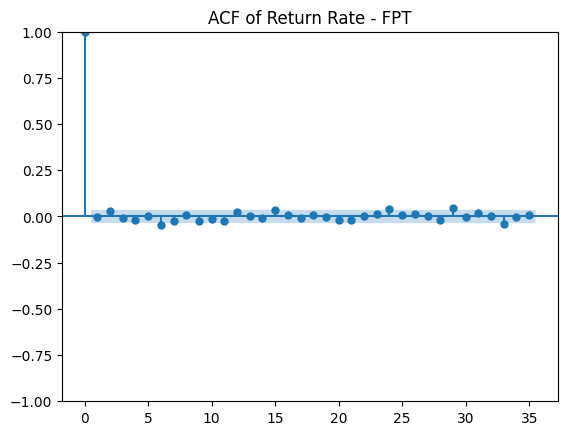

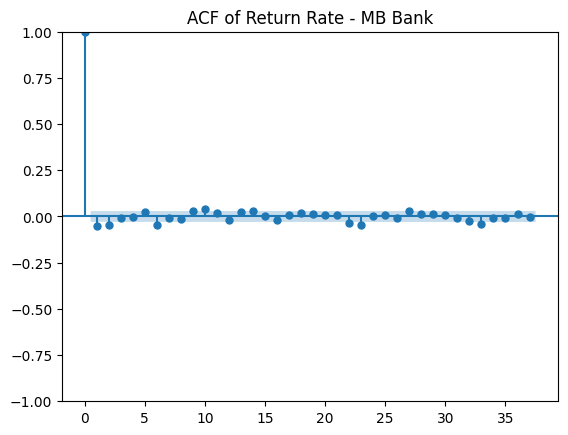

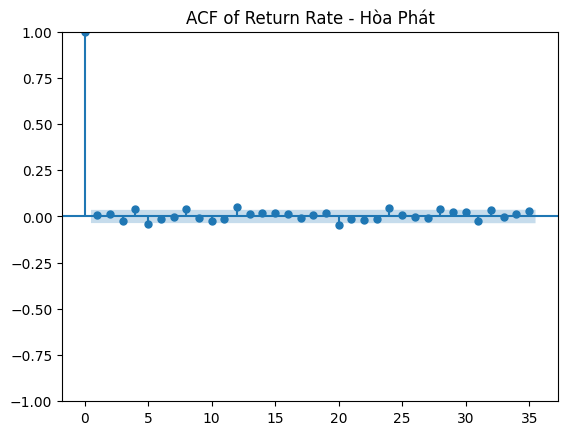

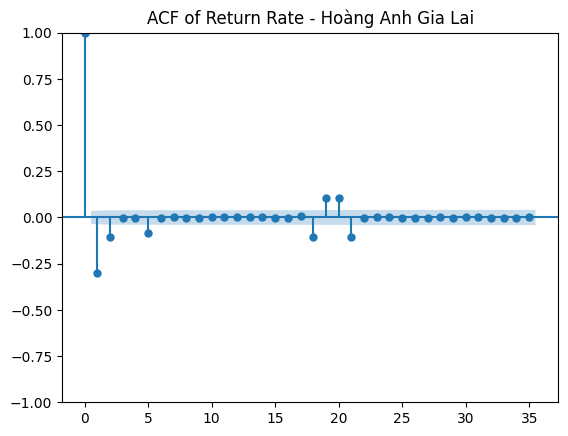

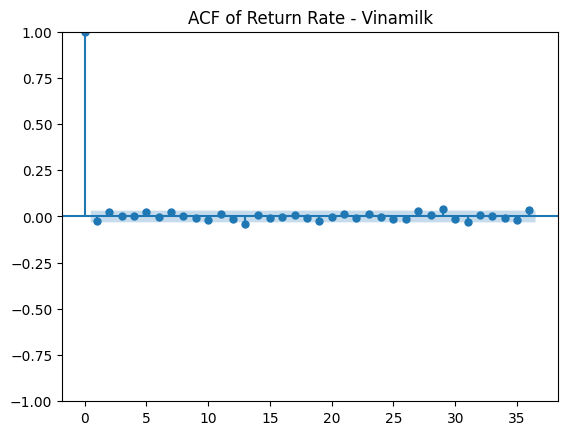

In [8]:
plt.figure(figsize = (8, 6))

# FPT - Hệ số tự tương quan ACF
ax1_fpt = plot_acf(r_t_fpt)
plt.title('ACF of Return Rate - FPT')
plt.show()

# MB Bank - Hệ số tự tương quan ACF
ax1_mbb = plot_acf(r_t_mbb)
plt.title('ACF of Return Rate - MB Bank')
plt.show()

# Hòa Phát - Hệ số tự tương quan ACF
ax1_hpg = plot_acf(r_t_hpg)
plt.title('ACF of Return Rate - Hòa Phát')
plt.show()

# Hoàng Anh Gia Lai - Hệ số tự tương quan ACF
ax1_hag = plot_acf(r_t_hag)
plt.title('ACF of Return Rate - Hoàng Anh Gia Lai')
plt.show()

# Vinamilk - Hệ số tự tương quan ACF
ax1_vnm = plot_acf(r_t_vnm)
plt.title('ACF of Return Rate - Vinamilk')
plt.show()

<Figure size 1600x1200 with 0 Axes>

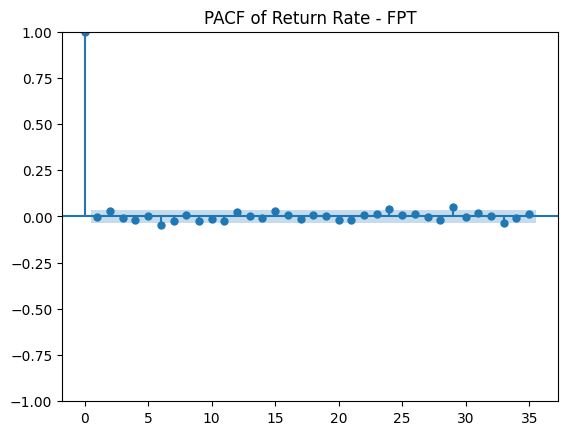

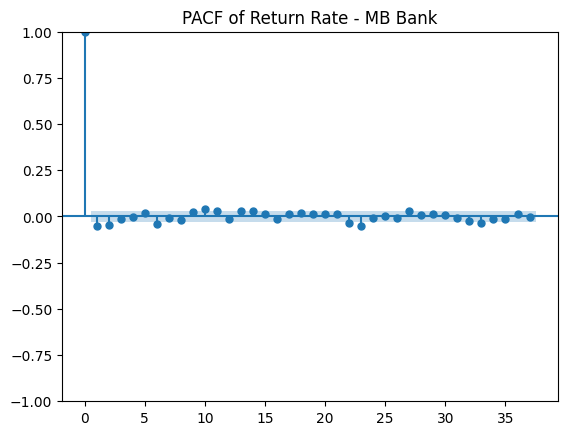

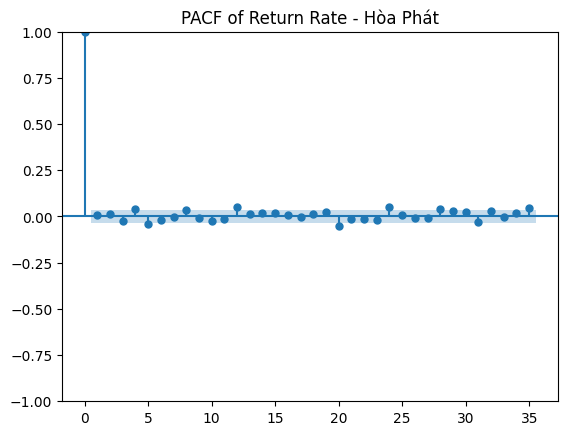

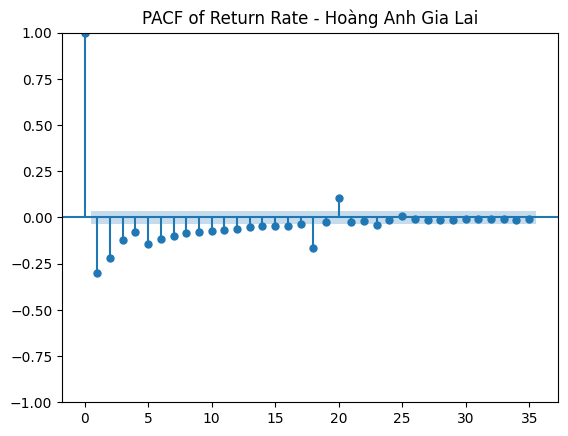

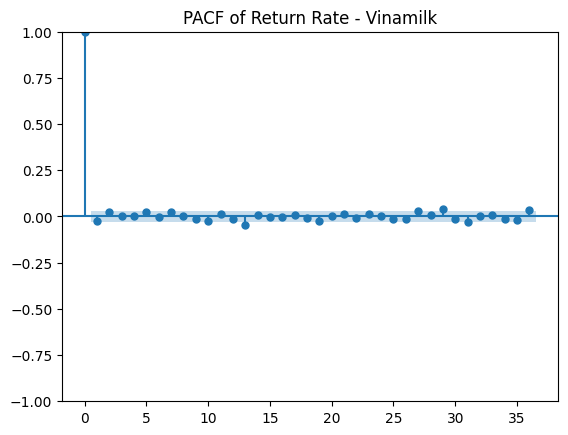

In [9]:
plt.figure(figsize = (16, 12))

# FPT - Hệ số tự tương quan từng phần PACF
ax1_fpt = plot_pacf(r_t_fpt)
plt.title('PACF of Return Rate - FPT')
plt.show()

# MB Bank - Hệ số tự tương quan từng phần PACF
ax1_mbb = plot_pacf(r_t_mbb)
plt.title('PACF of Return Rate - MB Bank')
plt.show()

# Hòa Phát - Hệ số tự tương quan từng phần PACF
ax1_hpg = plot_pacf(r_t_hpg)
plt.title('PACF of Return Rate - Hòa Phát')
plt.show()

# Hoàng Anh Gia Lai - Hệ số tự tương quan từng phần PACF
ax1_hag = plot_pacf(r_t_hag)
plt.title('PACF of Return Rate - Hoàng Anh Gia Lai')
plt.show()

# Vinamilk - Hệ số tự tương quan từng phần PACF
ax1_vnm = plot_pacf(r_t_vnm)
plt.title('PACF of Return Rate - Vinamilk')
plt.show()

In [10]:
# FPT
# ARIMA(1, 0, 1)
model_fpt_1_0_1 = ARIMA(r_t_fpt, order = (1, 0, 1))
model_fpt_1_0_1_fit = model_fpt_1_0_1.fit()
print(model_fpt_1_0_1_fit.summary())

# ARIMA(2, 0, 2)
model_fpt_2_0_2 = ARIMA(r_t_fpt, order = (2, 0, 2))
model_fpt_2_0_2_fit = model_fpt_2_0_2.fit()
print(model_fpt_2_0_2_fit.summary())

# ARIMA(3, 0, 3)
model_fpt_3_0_3 = ARIMA(r_t_fpt, order = (3, 0, 3))
model_fpt_3_0_3_fit = model_fpt_3_0_3.fit()
print(model_fpt_3_0_3_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3020
Model:                 ARIMA(1, 0, 1)   Log Likelihood                7933.207
Date:                Sat, 10 May 2025   AIC                         -15858.413
Time:                        04:52:30   BIC                         -15834.361
Sample:                             0   HQIC                        -15849.765
                               - 3020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.197      0.231      -0.000       0.001
ar.L1         -0.3816      2.671     -0.143      0.886      -5.617       4.854
ma.L1          0.3779      2.675      0.141      0.8

In [11]:
# MB Bank
# ARIMA(2, 0, 2)
model_mbb_2_0_2 = ARIMA(r_t_mbb, order = (2, 0, 2))
model_mbb_2_0_2_fit = model_mbb_2_0_2.fit()
print(model_mbb_2_0_2_fit.summary())

# ARIMA(4, 0, 4)
model_mbb_4_0_4 = ARIMA(r_t_mbb, order = (4, 0, 4))
model_mbb_4_0_4_fit = model_mbb_4_0_4.fit()
print(model_mbb_4_0_4_fit.summary())

# ARIMA(5, 0, 5)
model_mbb_5_0_5 = ARIMA(r_t_mbb, order = (5, 0, 5))
model_mbb_5_0_5_fit = model_mbb_5_0_5.fit()
print(model_mbb_5_0_5_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4479
Model:                 ARIMA(2, 0, 2)   Log Likelihood               19877.551
Date:                Sat, 10 May 2025   AIC                         -39743.101
Time:                        04:52:32   BIC                         -39704.658
Sample:                             0   HQIC                        -39729.552
                               - 4479                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.247e-05   3.92e-05      2.358      0.018    1.56e-05       0.000
ar.L1          0.3757      0.410      0.916      0.360      -0.428       1.179
ar.L2         -0.1341      0.230     -0.583      0.5

In [12]:
# Hòa Phát
# ARIMA(1, 0, 1)
model_hpg_1_0_1 = ARIMA(r_t_hpg, order=(1, 0, 1))
model_hpg_1_0_1_fit = model_hpg_1_0_1.fit()
print(model_hpg_1_0_1_fit.summary())

# ARIMA(2, 0, 2)
model_hpg_2_0_2 = ARIMA(r_t_hpg, order=(2, 0, 2))
model_hpg_2_0_2_fit = model_hpg_2_0_2.fit()
print(model_hpg_2_0_2_fit.summary())

# ARIMA(3, 0, 3)
model_hpg_3_0_3 = ARIMA(r_t_hpg, order=(3, 0, 3))
model_hpg_3_0_3_fit = model_hpg_3_0_3.fit()
print(model_hpg_3_0_3_fit.summary())

C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3017
Model:                 ARIMA(1, 0, 1)   Log Likelihood                7073.941
Date:                Sat, 10 May 2025   AIC                         -14139.882
Time:                        04:52:41   BIC                         -14115.834
Sample:                             0   HQIC                        -14131.235
                               - 3017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0006      0.000      1.239      0.215      -0.000       0.001
ar.L1          0.0032      2.374      0.001      0.999      -4.649       4.656
ma.L1          0.0032      2.374      0.001      0.9

In [13]:
# Hoàng Anh Gia Lai
# ARIMA(1, 0, 1)
model_hag_1_0_1 = ARIMA(r_t_hag, order=(1, 0, 1))
model_hag_1_0_1_fit = model_hag_1_0_1.fit()
print(model_hag_1_0_1_fit.summary())

# ARIMA(2, 0, 2)
model_hag_2_0_2 = ARIMA(r_t_hag, order=(2, 0, 2))
model_hag_2_0_2_fit = model_hag_2_0_2.fit()
print(model_hag_2_0_2_fit.summary())

# ARIMA(3, 0, 3)
model_hag_3_0_3 = ARIMA(r_t_hag, order=(3, 0, 3))
model_hag_3_0_3_fit = model_hag_3_0_3.fit()
print(model_hag_3_0_3_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2996
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -164.104
Date:                Sat, 10 May 2025   AIC                            336.208
Time:                        04:52:47   BIC                            360.228
Sample:                             0   HQIC                           344.849
                               - 2996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.002     -0.317      0.752      -0.004       0.003
ar.L1          0.4575      0.004    111.413      0.000       0.449       0.466
ma.L1         -0.9262      0.003   -358.738      0.0

C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2996
Model:                 ARIMA(2, 0, 2)   Log Likelihood                -163.133
Date:                Sat, 10 May 2025   AIC                            338.267
Time:                        04:52:50   BIC                            374.297
Sample:                             0   HQIC                           351.228
                               - 2996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.002     -0.320      0.749      -0.004       0.003
ar.L1         -0.2500      0.183     -1.363      0.173      -0.610       0.110
ar.L2          0.3415      0.080      4.254      0.0

C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [14]:
# Vinamilk
# ARIMA(1, 0, 2)
model_vnm_1_0_2 = ARIMA(r_t_vnm, order=(1, 0, 2))
model_vnm_1_0_2_fit = model_vnm_1_0_2.fit()
print(model_vnm_1_0_2_fit.summary())

# ARIMA(2, 0, 1)
model_vnm_2_0_1 = ARIMA(r_t_vnm, order=(2, 0, 1))
model_vnm_2_0_1_fit = model_vnm_2_0_1.fit()
print(model_vnm_2_0_1_fit.summary())

# ARIMA(3, 0, 1)
model_vnm_3_0_1 = ARIMA(r_t_vnm, order=(3, 0, 1))
model_vnm_3_0_1_fit = model_vnm_3_0_1.fit()
print(model_vnm_3_0_1_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3870
Model:                 ARIMA(1, 0, 2)   Log Likelihood               10603.081
Date:                Sat, 10 May 2025   AIC                         -21196.161
Time:                        04:52:55   BIC                         -21164.856
Sample:                             0   HQIC                        -21185.046
                               - 3870                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.560      0.576      -0.001       0.000
ar.L1          0.3064      0.466      0.658      0.510      -0.606       1.219
ma.L1         -0.3336      0.466     -0.715      0.4

In [15]:
def _arima_fit(orders, data):
  models = dict()
  for order in orders:
    model = ARIMA(data, order = order).fit()
    model_name = 'ARIMA({},{},{})'.format(order[0], order[1], order[2])
    print('{} --> AIC={}; BIC={}'.format(model_name, model.aic, model.bic))
    models[model_name] = model
  return models

In [16]:
# FPT: ARIMA với các bậc (1, 0, 1), (2, 0, 2), (3, 0, 3)
orders_fpt = [(1, 0, 1), (2, 0, 2), (3, 0, 3)]
print("FPT - ARIMA Orders:")
models_fpt = _arima_fit(orders_fpt, r_t_fpt)
print("\n")

# MB Bank: ARIMA với các bậc (2, 0, 2), (4, 0, 4), (5, 0, 5)
orders_mbb = [(2, 0, 2), (4, 0, 4), (5, 0, 5)]
print("MB Bank - ARIMA Orders:")
models_mbb = _arima_fit(orders_mbb, r_t_mbb)
print("\n")

# Hòa Phát: ARIMA với các bậc (1, 0, 1), (2, 0, 2), (3, 0, 3)
orders_hpg = [(1, 0, 1), (2, 0, 2), (3, 0, 3)]
print("Hòa Phát - ARIMA Orders:")
models_hpg = _arima_fit(orders_hpg, r_t_hpg)
print("\n")

# Hoàng Anh Gia Lai: ARIMA với các bậc (1, 0, 1), (2, 0, 2), (3, 0, 3)
orders_hag = [(1, 0, 1), (2, 0, 2), (3, 0, 3)]
print("Hoàng Anh Gia Lai - ARIMA Orders:")
models_hag = _arima_fit(orders_hag, r_t_hag)
print("\n")

# Vinamilk: ARIMA với các bậc (1, 0, 2), (2, 0, 1), (3, 0, 1)
orders_vnm = [(1, 0, 2), (2, 0, 1), (3, 0, 1)]
print("Vinamilk - ARIMA Orders:")
models_vnm = _arima_fit(orders_vnm, r_t_vnm)
print("\n")


FPT - ARIMA Orders:
ARIMA(1,0,1) --> AIC=-15858.413335146648; BIC=-15834.361286705172
ARIMA(2,0,2) --> AIC=-15854.64096870774; BIC=-15818.562896045525
ARIMA(3,0,3) --> AIC=-15853.35765470937; BIC=-15805.25355782642


MB Bank - ARIMA Orders:
ARIMA(2,0,2) --> AIC=-39743.101199507; BIC=-39704.658268989755
ARIMA(4,0,4) --> AIC=-39746.161697759526; BIC=-39682.090146897455
ARIMA(5,0,5) --> AIC=-39696.15707165496; BIC=-39619.27121062047


Hòa Phát - ARIMA Orders:


C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


ARIMA(1,0,1) --> AIC=-14139.882407321229; BIC=-14115.834334364592
ARIMA(2,0,2) --> AIC=-14141.998161947979; BIC=-14105.926052513025
ARIMA(3,0,3) --> AIC=-14140.644975660522; BIC=-14092.54882974725


Hoàng Anh Gia Lai - ARIMA Orders:
ARIMA(1,0,1) --> AIC=336.2079509543687; BIC=360.22808433291715
ARIMA(2,0,2) --> AIC=338.26684672956253; BIC=374.2970467973852


C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(3,0,3) --> AIC=319.2631427688166; BIC=367.3034095259135


Vinamilk - ARIMA Orders:
ARIMA(1,0,2) --> AIC=-21196.161408672146; BIC=-21164.856359742025
ARIMA(2,0,1) --> AIC=-21196.160903574408; BIC=-21164.855854644287
ARIMA(3,0,1) --> AIC=-21194.093986559874; BIC=-21156.52792784373




In [17]:
def auto_arima_custom(data, max_p=5, max_q=5):
    best_aic = np.inf  # Khởi tạo AIC với giá trị rất lớn
    best_order = None  # Khởi tạo order tốt nhất
    best_model = None  # Khởi tạo mô hình tốt nhất
    
    # Lặp qua tất cả các kết hợp (p, d=0, q) mà d luôn bằng 0
    for p in range(max_p + 1):  # p từ 0 đến max_p
        for q in range(max_q + 1):  # q từ 0 đến max_q
            try:
                model = ARIMA(data, order=(p, 0, q))  # d = 0 mặc định
                model_fit = model.fit()  # Fit mô hình
                aic = model_fit.aic  # Tính AIC của mô hình
                
                # Kiểm tra nếu AIC nhỏ hơn AIC tốt nhất hiện tại
                if aic < best_aic:
                    best_aic = aic
                    best_order = (p, 0, q)  # Lưu lại order với d=0
                    best_model = model_fit  # Lưu lại mô hình tốt nhất
                    
            except:
                continue  # Bỏ qua các mô hình không hợp lệ
    
    print(f"Best ARIMA order: {best_order} with AIC: {best_aic}")
    return best_model, best_order, best_aic

In [18]:
# FPT
best_model_fpt, best_order_fpt, best_aic_fpt = auto_arima_custom(r_t_fpt)
print("FPT Best Model:")
print(best_model_fpt.summary())

# MB Bank
best_model_mbb, best_order_mbb, best_aic_mbb = auto_arima_custom(r_t_mbb)
print("MB Bank Best Model:")
print(best_model_mbb.summary())

# Hòa Phát
best_model_hpg, best_order_hpg, best_aic_hpg = auto_arima_custom(r_t_hpg)
print("Hòa Phát Best Model:")
print(best_model_hpg.summary())

# Hoàng Anh Gia Lai
best_model_hag, best_order_hag, best_aic_hag = auto_arima_custom(r_t_hag)
print("Hoàng Anh Gia Lai Best Model:")
print(best_model_hag.summary())

# Vinamilk
best_model_vnm, best_order_vnm, best_aic_vnm = auto_arima_custom(r_t_vnm)
print("Vinamilk Best Model:")
print(best_model_vnm.summary())

C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

Best ARIMA order: (0, 0, 0) with AIC: -15862.147306122377
FPT Best Model:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3020
Model:                          ARIMA   Log Likelihood                7933.074
Date:                Sat, 10 May 2025   AIC                         -15862.147
Time:                        04:54:33   BIC                         -15850.121
Sample:                             0   HQIC                        -15857.823
                               - 3020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.183      0.237      -0.000       0.001
sigma2         0.0003   2.03e-06    150.340      0.000   

C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optim

Best ARIMA order: (0, 0, 2) with AIC: -39746.65787662911
MB Bank Best Model:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 4479
Model:                 ARIMA(0, 0, 2)   Log Likelihood               19877.329
Date:                Sat, 10 May 2025   AIC                         -39746.658
Time:                        04:56:10   BIC                         -39721.029
Sample:                             0   HQIC                        -39737.625
                               - 4479                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       9.248e-05   3.93e-05      2.352      0.019    1.54e-05       0.000
ma.L1         -0.0542      0.006     -8.444      0.000

C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn

Best ARIMA order: (4, 0, 3) with AIC: -14148.521012410498
Hòa Phát Best Model:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3017
Model:                 ARIMA(4, 0, 3)   Log Likelihood                7083.261
Date:                Sat, 10 May 2025   AIC                         -14148.521
Time:                        04:57:22   BIC                         -14094.413
Sample:                             0   HQIC                        -14129.064
                               - 3017                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.160      0.246      -0.000       0.001
ar.L1         -0.6132      0.132     -4.661      0.0

C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-s

Best ARIMA order: (0, 0, 5) with AIC: 314.64856444978705
Hoàng Anh Gia Lai Best Model:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2996
Model:                 ARIMA(0, 0, 5)   Log Likelihood                -150.324
Date:                Sat, 10 May 2025   AIC                            314.649
Time:                        04:59:14   BIC                            356.684
Sample:                             0   HQIC                           329.770
                               - 2996                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0005      0.002     -0.341      0.733      -0.004       0.003
ma.L1         -0.4925      0.004   -135.698 

C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
C:\Users\hype1\AppData\Local\Programs\Python\Python312\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warn

Best ARIMA order: (1, 0, 0) with AIC: -21198.143517364013
Vinamilk Best Model:
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 3870
Model:                 ARIMA(1, 0, 0)   Log Likelihood               10602.072
Date:                Sat, 10 May 2025   AIC                         -21198.144
Time:                        05:00:30   BIC                         -21179.360
Sample:                             0   HQIC                        -21191.474
                               - 3870                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.569      0.569      -0.001       0.000
ar.L1         -0.0267      0.012     -2.222      0.0

In [19]:
def predict_arima_from_model(model, initial_data, forecast_steps):
    # Truy xuất các hệ số AR và MA từ mô hình đã huấn luyện
    ar_params = model.arparams  # Hệ số AR
    ma_params = model.maparams  # Hệ số MA
    
    # Số lượng hệ số AR và MA
    p = len(ar_params)
    q = len(ma_params)

    # Khởi tạo mảng chứa các giá trị dự đoán
    forecast_values = []

    # Copy dữ liệu ban đầu để tránh thay đổi dữ liệu gốc
    data = initial_data.copy()
    
    # Dự đoán cho từng bước
    for step in range(forecast_steps):
        # AR: Tính giá trị tự hồi quy dựa trên các hệ số AR
        ar_term = np.sum([ar_params[i] * data[-(i + 1)] for i in range(p)]) if p > 0 else 0

        # MA: Tính giá trị trung bình động dựa trên các hệ số MA
        ma_term = np.sum([ma_params[i] * data[-(i + 1)] for i in range(q)]) if q > 0 else 0
        
        # Dự đoán giá trị tại bước tiếp theo
        forecast = ar_term + ma_term
        
        # Lưu giá trị dự đoán
        forecast_values.append(forecast)
        
        # Thêm giá trị dự đoán vào dữ liệu gốc (để sử dụng cho bước dự đoán tiếp theo)
        data = np.append(data, forecast)

    return np.array(forecast_values)

In [20]:
forecast_steps = 756

# Dự báo cho từng mô hình
forecast_values_fpt = predict_arima_from_model(best_model_fpt, r_t_fpt, forecast_steps)
forecast_values_mbb = predict_arima_from_model(best_model_mbb, r_t_mbb, forecast_steps)
forecast_values_hpg = predict_arima_from_model(best_model_hpg, r_t_hpg, forecast_steps)
forecast_values_hag = predict_arima_from_model(best_model_hag, r_t_hag, forecast_steps)
forecast_values_vnm = predict_arima_from_model(best_model_vnm, r_t_vnm, forecast_steps)

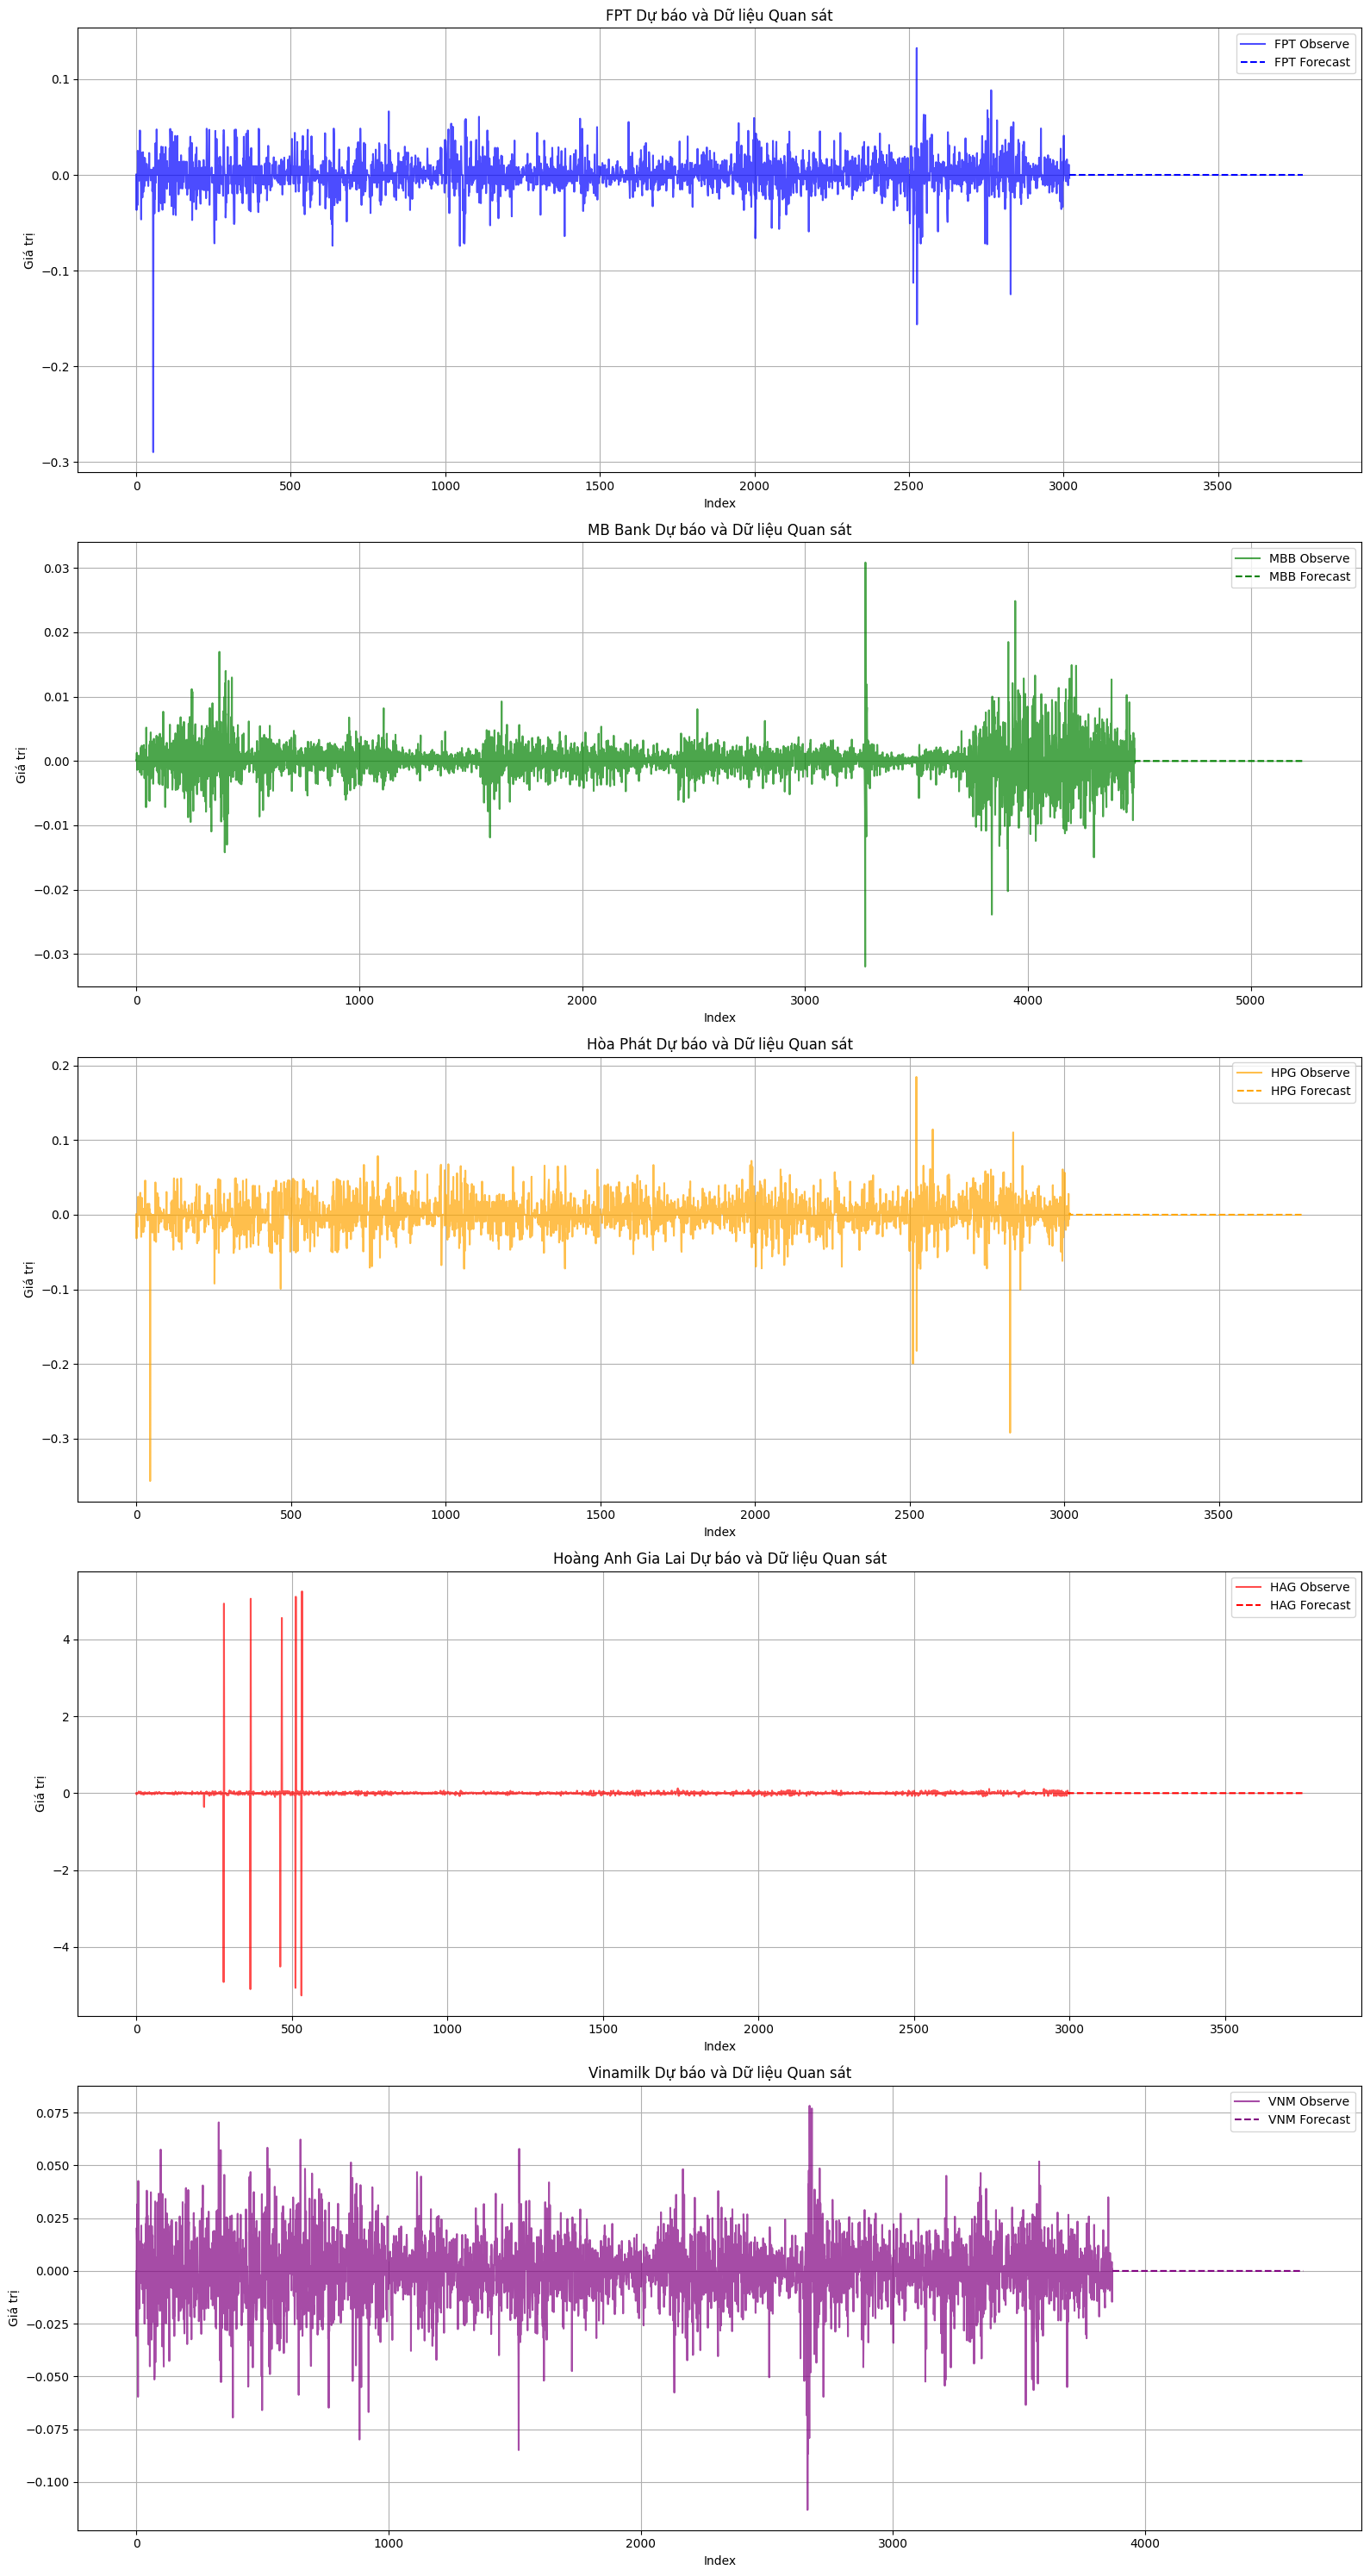

In [24]:
# Tạo 5 biểu đồ riêng biệt
fig, axes = plt.subplots(5, 1, figsize=(16, 30))

# FPT
axes[0].plot(r_t_fpt, label='FPT Observe', color='blue', alpha=0.7)
axes[0].plot(range(len(r_t_fpt), len(r_t_fpt) + forecast_steps), forecast_values_fpt, label='FPT Forecast', color='blue', linestyle='--')
axes[0].set_title('FPT Dự báo và Dữ liệu Quan sát')
axes[0].set_xlabel('Index')
axes[0].set_ylabel('Giá trị')
axes[0].legend()
axes[0].grid(True)

# MBB
axes[1].plot(r_t_mbb, label='MBB Observe', color='green', alpha=0.7)
axes[1].plot(range(len(r_t_mbb), len(r_t_mbb) + forecast_steps), forecast_values_mbb, label='MBB Forecast', color='green', linestyle='--')
axes[1].set_title('MB Bank Dự báo và Dữ liệu Quan sát')
axes[1].set_xlabel('Index')
axes[1].set_ylabel('Giá trị')
axes[1].legend()
axes[1].grid(True)

# HPG
axes[2].plot(r_t_hpg, label='HPG Observe', color='orange', alpha=0.7)
axes[2].plot(range(len(r_t_hpg), len(r_t_hpg) + forecast_steps), forecast_values_hpg, label='HPG Forecast', color='orange', linestyle='--')
axes[2].set_title('Hòa Phát Dự báo và Dữ liệu Quan sát')
axes[2].set_xlabel('Index')
axes[2].set_ylabel('Giá trị')
axes[2].legend()
axes[2].grid(True)

# HAG
axes[3].plot(r_t_hag, label='HAG Observe', color='red', alpha=0.7)
axes[3].plot(range(len(r_t_hag), len(r_t_hag) + forecast_steps), forecast_values_hag, label='HAG Forecast', color='red', linestyle='--')
axes[3].set_title('Hoàng Anh Gia Lai Dự báo và Dữ liệu Quan sát')
axes[3].set_xlabel('Index')
axes[3].set_ylabel('Giá trị')
axes[3].legend()
axes[3].grid(True)

# VNM
axes[4].plot(r_t_vnm, label='VNM Observe', color='purple', alpha=0.7)
axes[4].plot(range(len(r_t_vnm), len(r_t_vnm) + forecast_steps), forecast_values_vnm, label='VNM Forecast', color='purple', linestyle='--')
axes[4].set_title('Vinamilk Dự báo và Dữ liệu Quan sát')
axes[4].set_xlabel('Index')
axes[4].set_ylabel('Giá trị')
axes[4].legend()
axes[4].grid(True)

# Hiển thị tất cả biểu đồ
plt.tight_layout()
plt.show()